In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import PIL
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Loading Flower dataset


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


In [3]:
data_dir = tf.keras.utils.get_file('flower photos', origin=dataset_url , cache_dir="." , untar = True)

228813984/228813984 [==============================] - 2s 0us/step


In [4]:
data_dir

'./datasets/flower photos'

In [5]:
import pathlib
data_dir = pathlib.Path("/content/datasets/flower_photos")
data_dir

PosixPath('/content/datasets/flower_photos')

In [6]:
list(data_dir.glob("*/*.jpg"))[:5]

[PosixPath('/content/datasets/flower_photos/tulips/6799076717_575944af91_m.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/15147473067_7c5498eb0e_m.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/6989946990_62c639ff16_n.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/7448453762_aea8739f1b.jpg')]

In [7]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [8]:
roses = list(data_dir.glob("roses/*"))[:5]


In [9]:
roses[:5]

[PosixPath('/content/datasets/flower_photos/roses/4754734410_94d98463a5.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/8523394349_61b31fdd8f_m.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/2409069862_b128ee2a71.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/3115889021_053f3b8e5a.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/272481307_1eb47ba3e0_n.jpg')]

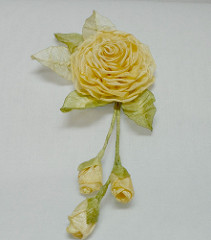

In [10]:
PIL.Image.open(roses[1])

In [11]:
tulips = list(data_dir.glob("tulips/*"))
tulips[:5]

[PosixPath('/content/datasets/flower_photos/tulips/6799076717_575944af91_m.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/15147473067_7c5498eb0e_m.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/6989946990_62c639ff16_n.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/7448453762_aea8739f1b.jpg')]

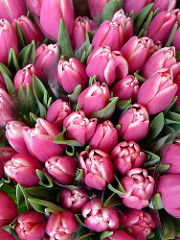

In [12]:
PIL.Image.open(tulips[0])

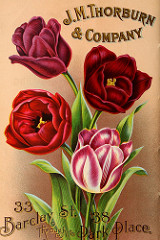

In [13]:
PIL.Image.open(tulips[1])

Converting image to np array

In [14]:
type(tulips[0])

pathlib.PosixPath

In [15]:
img = PIL.Image.open(tulips[0])

In [16]:
np.array(img)

array([[[249, 150, 196],
        [250, 181, 212],
        [246, 190, 215],
        ...,
        [ 18,  18,  20],
        [  6,   7,  11],
        [ 34,   1,  20]],

       [[251, 137, 188],
        [252, 164, 204],
        [230, 155, 186],
        ...,
        [ 13,  18,  14],
        [  1,   7,   5],
        [ 21,   0,   8]],

       [[255, 128, 185],
        [249, 137, 185],
        [235, 133, 173],
        ...,
        [  7,  19,   9],
        [  0,  12,   2],
        [ 13,   1,   1]],

       ...,

       [[188,  33,  75],
        [185,  33,  74],
        [180,  31,  73],
        ...,
        [ 90,  11,  43],
        [ 98,  23,  56],
        [ 96,  22,  57]],

       [[182,  33,  73],
        [186,  35,  78],
        [185,  34,  79],
        ...,
        [104,   5,  49],
        [114,  11,  58],
        [118,  12,  61]],

       [[182,  40,  78],
        [183,  36,  78],
        [184,  33,  78],
        ...,
        [127,  41,  78],
        [132,  40,  81],
        [138,  41,  86]]

In [17]:
flowers_img_dict = {
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "roses" : list(data_dir.glob("roses/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*"))
}

In [18]:
flowers_labels = {
    "daisy" : 0,
    "dandelion" : 1,
    "roses" : 2,
    "sunflowers" :3,
    "tulips" : 4
}

In [19]:
flowers_img_dict['roses'][:5]

[PosixPath('/content/datasets/flower_photos/roses/4754734410_94d98463a5.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/8523394349_61b31fdd8f_m.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/2409069862_b128ee2a71.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/3115889021_053f3b8e5a.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/272481307_1eb47ba3e0_n.jpg')]

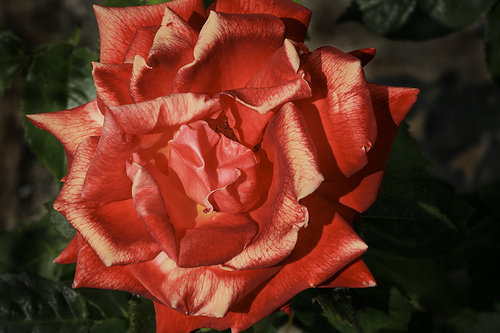

In [20]:
PIL.Image.open(flowers_img_dict['roses'][0])

In [21]:
x,y = [],[]
for flower_name , images in flowers_img_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    img = cv2.resize(img , (180,180))
    x.append(img)
    y.append(flowers_labels[flower_name])


In [22]:
type(x)

list

In [23]:
x = np.array(x)
y = np.array(y)

In [24]:
type(x)

numpy.ndarray

In [25]:
y[630:640]

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train,y_test = train_test_split(x,y,stratify=y, random_state=42)

In [27]:
#This will run only if y_train is list but we typecast it in np.array but it is stratified sampled
#y_train.count(1)


In [28]:
#673/len(y_train)

In [29]:
#y.count(1)

In [30]:
#898/len(y)

Hence our train test is statified

Preprocessing: scale images

In [31]:
x_train = x_train /255
x_test = x_test / 255

In [32]:
x_train[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.03137255, 0.17254902, 0.15294118],
        [0.01176471, 0.00784314, 0.00784314],
        [0.00392157, 0.01960784, 0.00784314]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.02352941, 0.22352941, 0.21176471],
        [0.00784314, 0.02745098, 0.01176471],
        [0.        , 0.01568627, 0.00784314]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.01960784, 0.35686275, 0.38823529],
        [0.02745098, 0.14509804, 0.09803922],
        [0.01176471, 0.00392157, 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.00392157, 0.02352941, 0.01960784],
        [0.        , 0

In [33]:
x_train.shape

(2752, 180, 180, 3)

Build convolutional neural network and train it

In [34]:
from keras.api._v2.keras import activations
from logging import Filter
model = Sequential([
    #CNN
    keras.layers.Conv2D(filters = 16 , kernel_size = (3,3) , padding = "same" , activation =  "relu"),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(filters = 32 , kernel_size = (3,3) , padding = "same" , activation =  "relu"),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(filters = 64 , kernel_size = (3,3) , padding = "same" , activation =  "relu"),
    keras.layers.MaxPooling2D(),

    #Flatern
    keras.layers.Flatten(),

    #ANN
    keras.layers.Dense(1288 , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'relu'),
    keras.layers.Dense(5 , activation = 'softmax'),
])

In [35]:
, metrics
from keras.engine.training import optimizer
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

In [36]:
y_train[100:200]

array([2, 2, 3, 1, 3, 4, 0, 4, 4, 3, 1, 4, 0, 2, 0, 2, 4, 3, 0, 1, 1, 0,
       1, 4, 4, 0, 3, 1, 3, 3, 4, 4, 0, 2, 4, 2, 3, 3, 4, 2, 4, 3, 2, 3,
       3, 0, 3, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 4, 2, 2, 3, 4, 2, 4, 3,
       3, 0, 2, 1, 2, 3, 3, 3, 0, 0, 2, 4, 0, 1, 4, 1, 3, 2, 4, 1, 2, 3,
       2, 0, 0, 4, 0, 4, 4, 0, 0, 1, 2, 4])

In [37]:
model.fit(x_train,y_train , epochs=50)

Epoch 1/50
86/86 [==============================] - 15s 27ms/step - loss: 1.6362 - accuracy: 0.2391
Epoch 2/50
86/86 [==============================] - 3s 30ms/step - loss: 1.6054 - accuracy: 0.2445
Epoch 3/50
86/86 [==============================] - 2s 27ms/step - loss: 1.6036 - accuracy: 0.2445
Epoch 4/50
86/86 [==============================] - 2s 27ms/step - loss: 1.6024 - accuracy: 0.2445
Epoch 5/50
86/86 [==============================] - 3s 30ms/step - loss: 1.6015 - accuracy: 0.2445
Epoch 6/50
86/86 [==============================] - 2s 27ms/step - loss: 1.6011 - accuracy: 0.2445
Epoch 7/50
86/86 [==============================] - 2s 29ms/step - loss: 1.6008 - accuracy: 0.2445
Epoch 8/50
86/86 [==============================] - 2s 28ms/step - loss: 1.6006 - accuracy: 0.2445
Epoch 9/50
86/86 [==============================] - 2s 27ms/step - loss: 1.6005 - accuracy: 0.2445
Epoch 10/50
86/86 [==============================] - 2s 27ms/step - loss: 1.6004 - accuracy: 0.2445
Epoch 11

In [38]:
y_test.shape

(918,)

In [39]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 1s 18ms/step - loss: 1.5999 - accuracy: 0.2451


[1.5999315977096558, 0.2450980395078659]

In [40]:
y_pred = model.predict(x_test)

29/29 [==============================] - 0s 10ms/step


In [41]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       158
           1       0.25      1.00      0.39       225
           2       0.00      0.00      0.00       160
           3       0.00      0.00      0.00       175
           4       0.00      0.00      0.00       200

    accuracy                           0.25       918
   macro avg       0.05      0.20      0.08       918
weighted avg       0.06      0.25      0.10       918



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
y_pred_classes[:5]

[1, 1, 1, 1, 1]

In [43]:
y_test[:5]

array([1, 2, 2, 0, 3])

Improve Test Accuracy Using Data Augmentation

In [44]:
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal" , input_shape=(180,180,3))
])

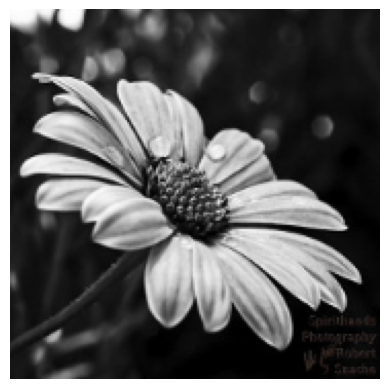

In [45]:
import matplotlib.pyplot as plt

plt.axis('off')
plt.imshow(x[0])

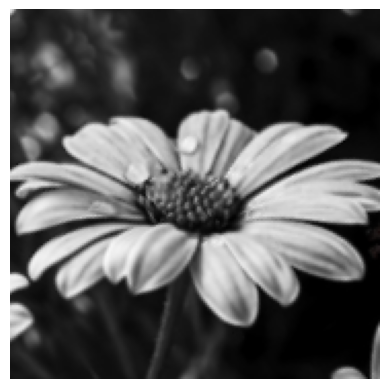

In [46]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

Train the model using data augmentation and a drop out layer

In [47]:
model1 = Sequential([
    #data_augumentation
    data_augmentation,
    #CNN
    keras.layers.Conv2D(filters = 16 , kernel_size = (3,3) , padding = "same" , activation =  "relu"),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(filters = 32 , kernel_size = (3,3) , padding = "same" , activation =  "relu"),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(filters = 64 , kernel_size = (3,3) , padding = "same" , activation =  "relu"),
    keras.layers.MaxPooling2D(),

    #Dropout
    layers.Dropout(0.2),

    #Flatern
    keras.layers.Flatten(),

    #ANN
    keras.layers.Dense(1288 , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'relu'),
    keras.layers.Dense(5 , activation = 'softmax'),
])

In [48]:
, metrics
from keras.engine.training import optimizer
model1.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

In [55]:
model1.fit(x_train, y_train, epochs=100)

Epoch 1/100
86/86 [==============================] - 3s 36ms/step - loss: 0.2403 - accuracy: 0.9182
Epoch 2/100
86/86 [==============================] - 3s 35ms/step - loss: 0.2113 - accuracy: 0.9299
Epoch 3/100
86/86 [==============================] - 3s 37ms/step - loss: 0.1854 - accuracy: 0.9350
Epoch 4/100
86/86 [==============================] - 3s 35ms/step - loss: 0.2316 - accuracy: 0.9193
Epoch 5/100
86/86 [==============================] - 3s 35ms/step - loss: 0.1587 - accuracy: 0.9397
Epoch 6/100
86/86 [==============================] - 3s 35ms/step - loss: 0.2063 - accuracy: 0.9255
Epoch 7/100
86/86 [==============================] - 3s 36ms/step - loss: 0.1894 - accuracy: 0.9386
Epoch 8/100
86/86 [==============================] - 3s 34ms/step - loss: 0.1281 - accuracy: 0.9575
Epoch 9/100
86/86 [==============================] - 3s 35ms/step - loss: 0.1292 - accuracy: 0.9560
Epoch 10/100
86/86 [==============================] - 3s 35ms/step - loss: 0.1689 - accuracy: 0.9444

In [50]:
model1.evaluate(x_test,y_test)

29/29 [==============================] - 1s 11ms/step - loss: 0.9445 - accuracy: 0.7451


[0.9445391893386841, 0.7450980544090271]

In [51]:
y_pred = model1.predict(x_test)

29/29 [==============================] - 0s 10ms/step


In [52]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.68      0.75       158
           1       0.85      0.74      0.79       225
           2       0.61      0.71      0.66       160
           3       0.76      0.90      0.82       175
           4       0.70      0.70      0.70       200

    accuracy                           0.75       918
   macro avg       0.75      0.74      0.74       918
weighted avg       0.75      0.75      0.75       918



In [53]:
y_pred_classes[:5]

[1, 3, 2, 2, 3]

In [54]:
y_test[:5]

array([1, 2, 2, 0, 3])